# Proyecto de python



## Estudiante: Guillermo Cáceres
## Profesor: Joel Orellana

### Importaciones necesarias para el desarrollo del proyecto

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Elección del conjunto de datos

#### El conjunto de datos que he elegido para el desarrollo de este proyecto se llama StudentsPerformance, y es un dataset acerca del rendimiento de los estudiantes examenes

In [33]:
df = pd.read_csv('StudentsPerformance.csv')

### 1.1 Descripción para conocer un poco más acerca del dataset

In [34]:
#Visualizamos las primeras filas del dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [35]:
#Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [36]:
# Descripción de columnas númericas del dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 2. Análisis exploratorio de datos (EDA automático)

#### Instalamos y_data_profiling para que nos apoye con el EDA

In [37]:
# Instalamos y_data_profiling
!pip install ydata_profiling

#### Importamos ProfileReport

In [38]:
# Importamos el ProfileReport
from ydata_profiling import ProfileReport

In [39]:
profile = ProfileReport(df, title='Analisis exploratorio de datos del dataset StudentsPerformance', explorative=True)

In [40]:
# Para visualizar el informe en el notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 45.94it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 3. Limpieza y transformación de los datos

#### En esta parte vamos a limpiar el dataset y transformar los datos de ser necesario

#### 3.1 Buscamos valores nulos

In [41]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


#### Buscamos la suma de los valores nulos en todo el dataset


In [42]:
# Suma de valores nulos por columna
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


#### Este dataset no cuenta con valores nulos por lo que no hace falta rellenar o eliminar ninguna columna o datos

#### 3.2 Revision del tipo de datos

In [43]:
# Verificamos el tipo de dato de las columnas
df.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


#### Vamos a convertir ciertas variables como categoricas para poder facilitar el análisis

In [44]:
# Convertimos las columnas que queremos categorizar a 'category'
df['gender'] = df['gender'].astype('category')
df['race/ethnicity'] = df['race/ethnicity'].astype('category')
df['parental level of education'] = df['parental level of education'].astype('category')
df['lunch'] = df['lunch'].astype('category')
df['test preparation course'] = df['test preparation course'].astype('category')

In [45]:
# Verificamos el tipo de dato de las columnas
df.dtypes

,0
gender,category
race/ethnicity,category
parental level of education,category
lunch,category
test preparation course,category
math score,int64
reading score,int64
writing score,int64


#### 3.3 Revisión de valores atípicos para variables númericas

In [46]:
# Visualizamos una descripcion y rangos de los datos númericos
df[['math score', 'reading score', 'writing score']].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Hemos verificado que todos los valores estan dentro de un rango normal (0-100), por lo que no necesitamos actuar en este caso

### 4. Visualización de resultados

#### 4.1 Promedio de calificaciones por género

<Figure size 1000x600 with 0 Axes>

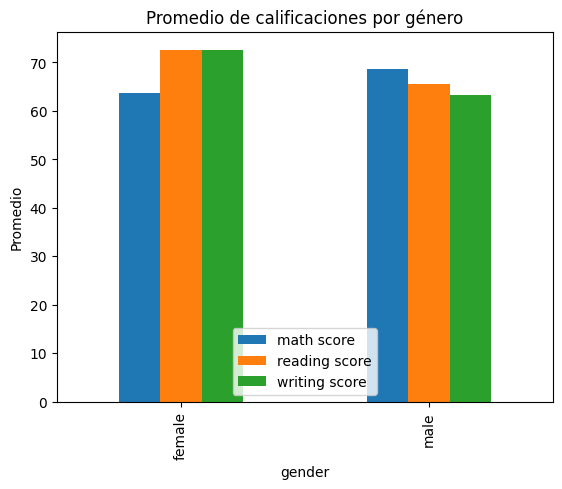

In [47]:
plt.figure(figsize=(10,6))
# Agrupamos las calificaciones por género y sacamos promedio
df.groupby('gender')[['math score', 'reading score', 'writing score']].mean().plot(kind='bar')
plt.title('Promedio de calificaciones por género')
plt.ylabel('Promedio')
plt.show()

#### 4.2 Distribución de calificaciones

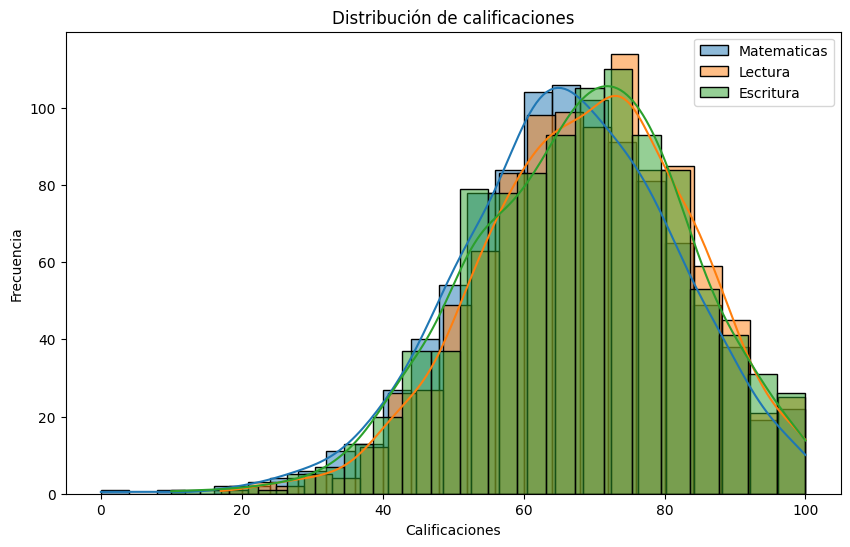

In [48]:
plt.figure(figsize=(10,6))
#Agregamos las columnas de calificaciones al gráfico
sns.histplot(df['math score'], kde= True, label='Matematicas')
sns.histplot(df['reading score'], kde= True, label='Lectura')
sns.histplot(df['writing score'], kde= True, label='Escritura')
plt.title('Distribución de calificaciones')
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

#### 4.3 Relación entre preparación y desempeño

<Figure size 1000x600 with 0 Axes>

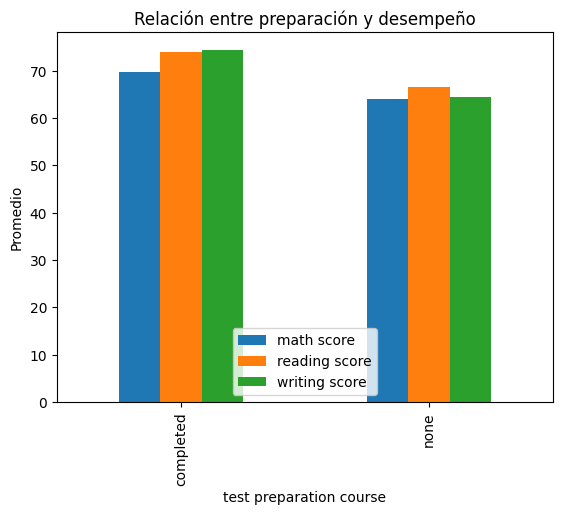

In [49]:
plt.figure(figsize=(10,6))
# Agrupamos las columnas de calificaciones segun la columna categorica de preparación del curso
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().plot(kind='bar')
plt.title('Relación entre preparación y desempeño')
plt.ylabel('Promedio')
plt.show()

#### 4.4 Calificaciones de escritura segun grupo étnico

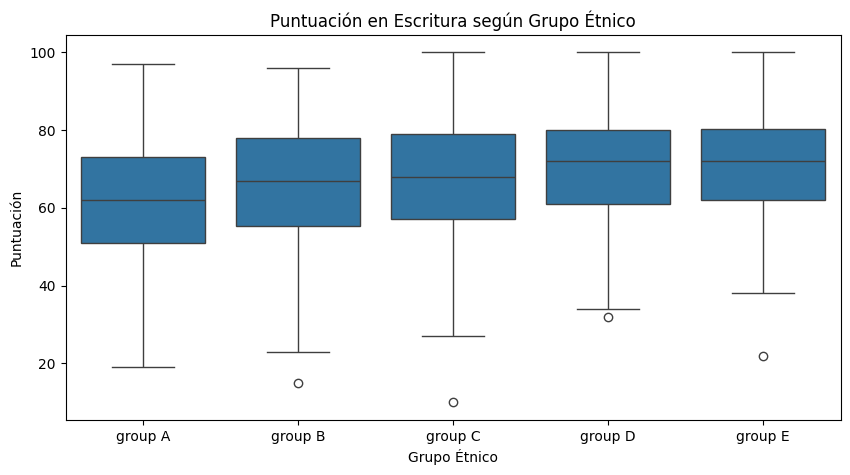

In [50]:
plt.figure(figsize=(10,5))
# Creamos el gráfico con la columna de grupo étnico y de califiaciones de escritura
sns.boxplot(x='race/ethnicity', y='writing score', data=df)
plt.title('Puntuación en Escritura según Grupo Étnico')
plt.xlabel('Grupo Étnico')
plt.ylabel('Puntuación')
plt.show()

#### 4.5 Calificaciones segun almuerzo de los estudiantes

<Figure size 1000x600 with 0 Axes>

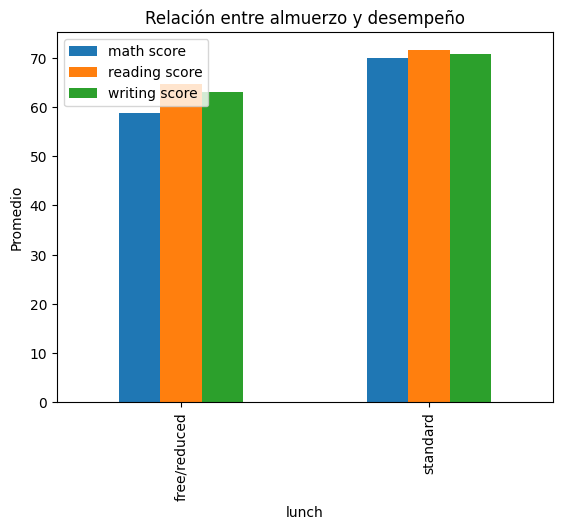

In [51]:
plt.figure(figsize=(10,6))
# Agrupamos las columnas de calificaciones segun la columna categorica de almuerzo
df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean().plot(kind='bar')
plt.title('Relación entre almuerzo y desempeño')
plt.ylabel('Promedio')
plt.show()